In [1]:
import numpy as np
from mpl_toolkits import mplot3d
from cntxt import rom_am
from rom_am import *
import matplotlib.pyplot as plt

In [2]:
def func(nx, nt, t_stop = 2):
    x = np.linspace(0, 1, nx)
    t = np.linspace(0, 2, ny)
    tt, xx = np.meshgrid(t, x, )
    z = np.exp(-np.abs((xx-.5)*(tt-1))) + np.sin(xx**tt)
    
    return z


nx = 1000
ny = 100
x = np.linspace(0, 1, nx)
t = np.linspace(0, 2, ny)
tt, xx = np.meshgrid(t, x, )
z = func(nx, ny)

In [3]:
pod = POD()
rom = ROM(pod)

In [4]:
rom.decompose(z, alg="svd")

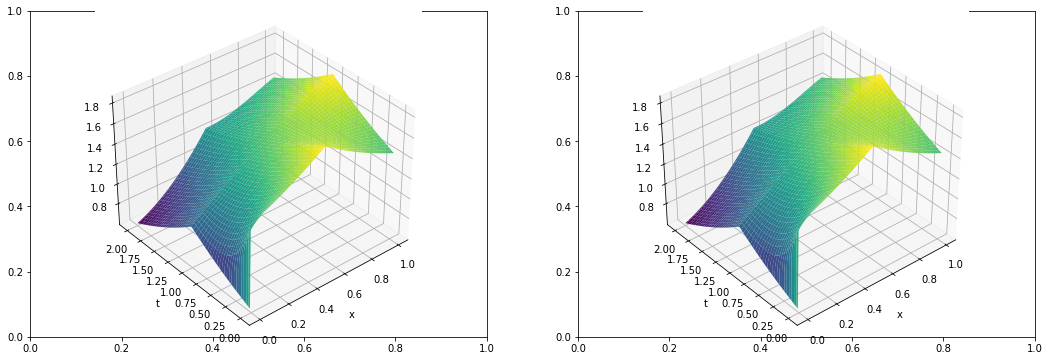

In [5]:
rank = 10

## ----------------------------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx, tt, z, cmap='viridis', edgecolor='none')
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.view_init(35, 230)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(xx, tt, rom.reconstruct(rank), cmap='viridis', edgecolor='none')
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.view_init(35, 230)

plt.show()

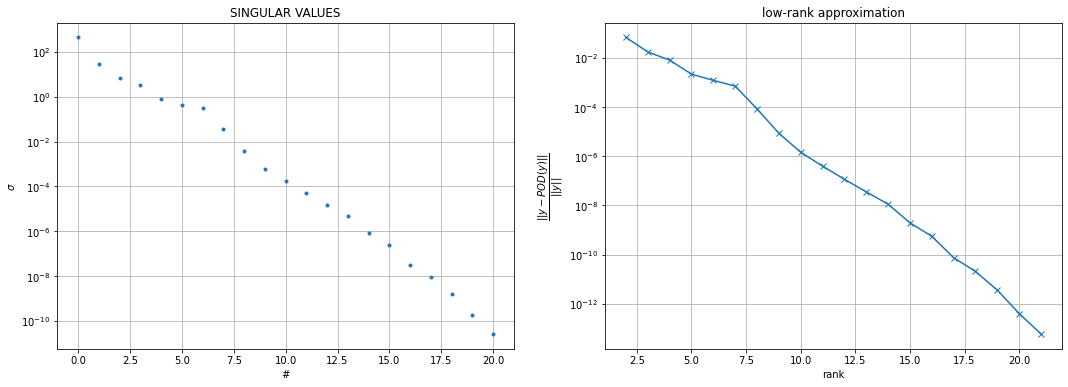

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
y = np.zeros(20)
ranks = np.arange(20)+2
rom.decompose(z, rank = ranks[-1])
for i in range(20):
    y[i] = np.linalg.norm(z - rom.reconstruct(i+1))/np.linalg.norm(z)

    
ax[0].semilogy(pod.singvals, '.')
ax[0].grid();
ax[0].set_ylabel("$\sigma$")
ax[0].set_xlabel("#");
ax[0].set_title("SINGULAR VALUES");

ax[1].semilogy(ranks, y, 'x-')
ax[1].grid();
ax[1].set_ylabel("$\dfrac{||y - POD(y)||}{||y||}$")
ax[1].set_xlabel("rank");
ax[1].set_title("low-rank approximation");

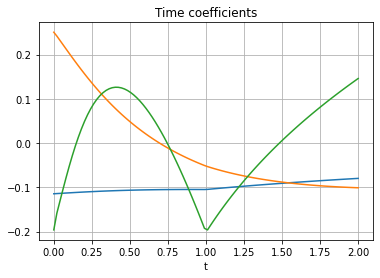

In [7]:
fig = plt.figure()

plt.plot(t, rom.time[0, :])
plt.plot(t, rom.time[1, :])
plt.plot(t, rom.time[2, :])
plt.grid();
plt.title("Time coefficients");
plt.xlabel("t");

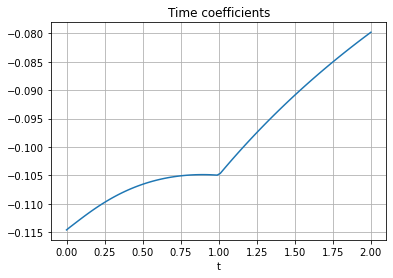

In [8]:
times_ = np.dot(z.T, rom.modes)
fig = plt.figure()

plt.plot(t, times_[:, 0]/rom.singvals[0])
plt.grid();
plt.title("Time coefficients");
plt.xlabel("t");

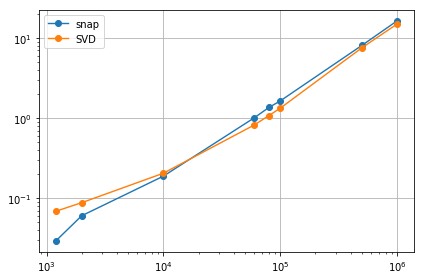

In [9]:
import time
cov_times = []
svd_times = []
sizes = np.array([1200, 2000, 10000, 60000, 80000, 1e5, 5e5, 1e6]).astype(int) 
nt = 5

for s in  sizes:
    t0 = time.time()
    for _ in range (nt):
        pod = POD()
        rom = ROM(pod)
        rom.decompose(func(s, ny), alg = "snap")
    t1 = time.time()
    cov_times.append((t1 - t0)/nt)

    t0 = time.time()
    for _ in range (nt):
        pod = POD()
        rom = ROM(pod)
        rom.decompose(func(s, ny), alg = "svd")
    t1 = time.time()
    svd_times.append((t1 - t0)/nt)

plt.loglog(sizes, cov_times, "o-", label = "snap", linewidth = 1.4);
plt.loglog(sizes, svd_times, "o-", label = "SVD", linewidth = 1.4);
plt.grid();
plt.legend();
plt.tight_layout();

**DMD**

In [9]:
dt = t[-1]-t[-2]
dmd = DMD()
rom = ROM(dmd)
rom.decompose(z[:, :-1], Y=z[:, 1::], dt = dt, rank = 0, sorting="real")

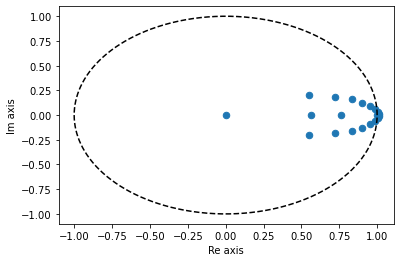

In [10]:
plt.plot(np.real(rom.model.lambd), np.imag(rom.model.lambd), '.', markersize = 13);
plt.xlabel("Re axis");
plt.ylabel("Im axis");
theta = np.linspace(0, 2*np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--");

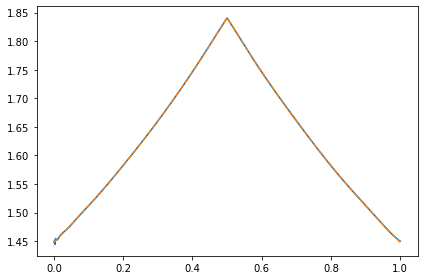

In [12]:
ind = int(0/2)
plt.plot(x, np.real(rom.predict(t = t, method = 0)[:, 0]));
plt.plot(x, z[:, 0], '--');
plt.tight_layout();